In [1]:
# To run this notebook, first install gmsh by running the following terminal command:
# sudo apt install python3-gmsh
# Next, install the following using pip:
# !pip install pygmsh meshio pyvista vtk

In [2]:
!pip uninstall tetridiv --yes

In [3]:
!pip install ..

Processing /root/shared
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tetridiv: filename=tetridiv-0.0.0-py3-none-any.whl size=7018 sha256=60f3190b8543757bfb0ab8a848e88db43f68dc1f808dae187369b0dbfd8491de
  Stored in directory: /tmp/pip-ephem-wheel-cache-eo54laym/wheels/8f/7d/50/5ad8920b2b5372a158050084f2391ebd3595733554d4647d06
Successfully built tetridiv


In [4]:
import pygmsh
import meshio
import os
import tetridiv
from visualisation_helpers import plot_mesh, create_pyvista_grid

In [5]:
show_args = {}
# For interactive plots, uncomment the following line:
# show_args = {'jupyter_backend': 'panel', 'return_viewer': True}

# 2d Surface Tests

In [6]:
centre = [0.0, 0.0, 0.0]
radius = 1.0
mesh_size = 0.1
with pygmsh.geo.Geometry() as geom:
    geom.add_circle(centre, radius, mesh_size, num_sections = 4)
    pygmsh_mesh = geom.generate_mesh(dim=2)
    pygmsh.write('circle.msh')
mesh = meshio.read("circle.msh")
os.remove("circle.msh")

In [7]:
# Specify points and cells explicitly + remove redundant z coords:
divmesh = tetridiv.tri2quad(points=mesh.points[:,:-1], cells=mesh.cells_dict['triangle'], output_type='meshio')

/usr/local/lib/python3.9/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


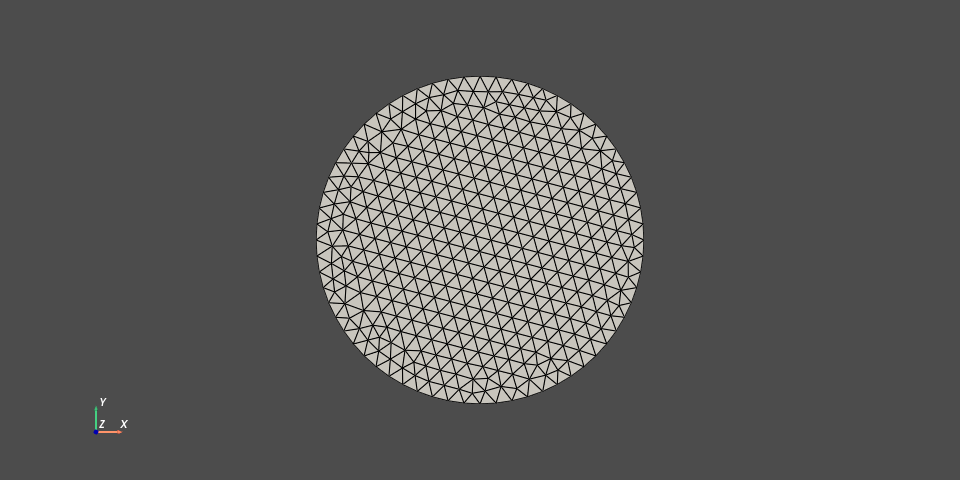

In [8]:
p = plot_mesh(mesh)
p.show(**show_args)

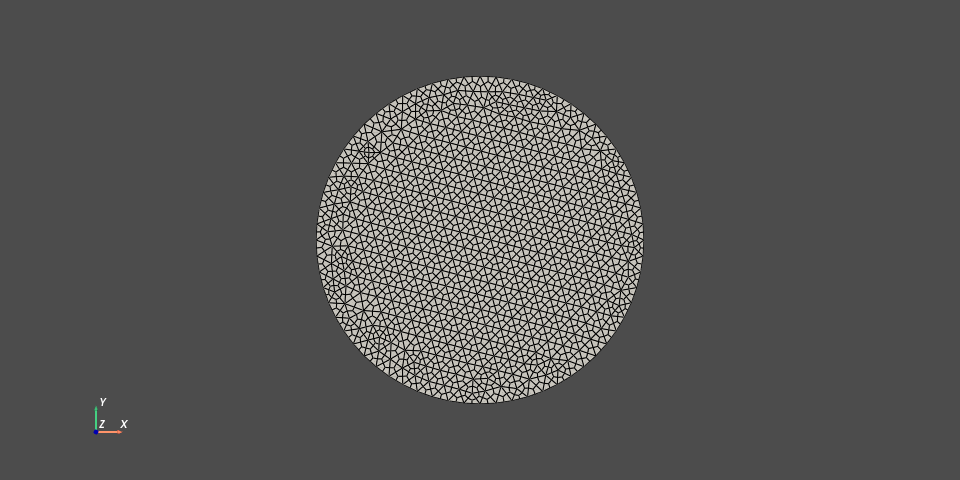

In [9]:
p = plot_mesh(divmesh)
p.show(**show_args)

# 3d Surface Test

In [10]:
centre = [0.0, 0.0, 0.0]
radii = [1.0, 1.5, 2.0]
mesh_size = 0.25
with pygmsh.geo.Geometry() as geom:
    geom.add_ellipsoid(centre, radii, mesh_size, with_volume=False)
    pygmsh_mesh = geom.generate_mesh(dim=2)
    pygmsh.write('ellipsoid.msh')
mesh = meshio.read("ellipsoid.msh")
os.remove("ellipsoid.msh")

In [11]:
divmesh = tetridiv.tri2quad(mesh)

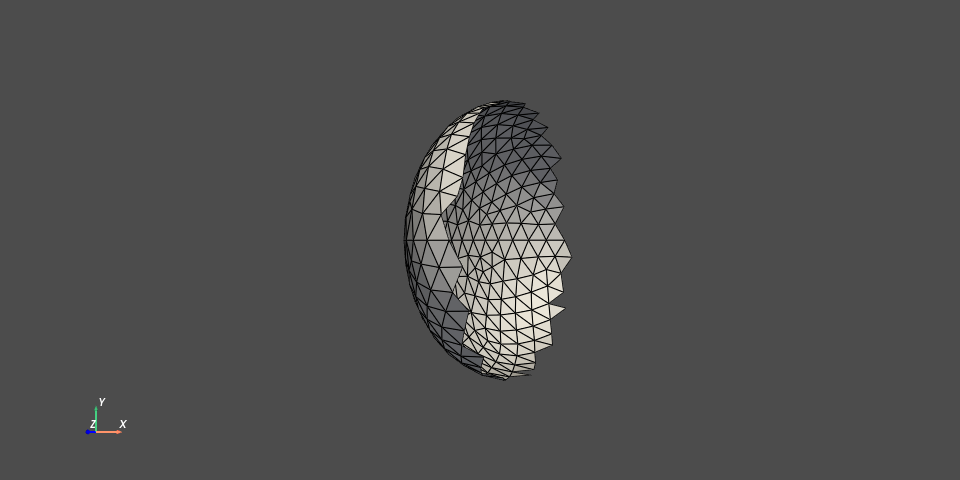

In [12]:
p = plot_mesh(mesh, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

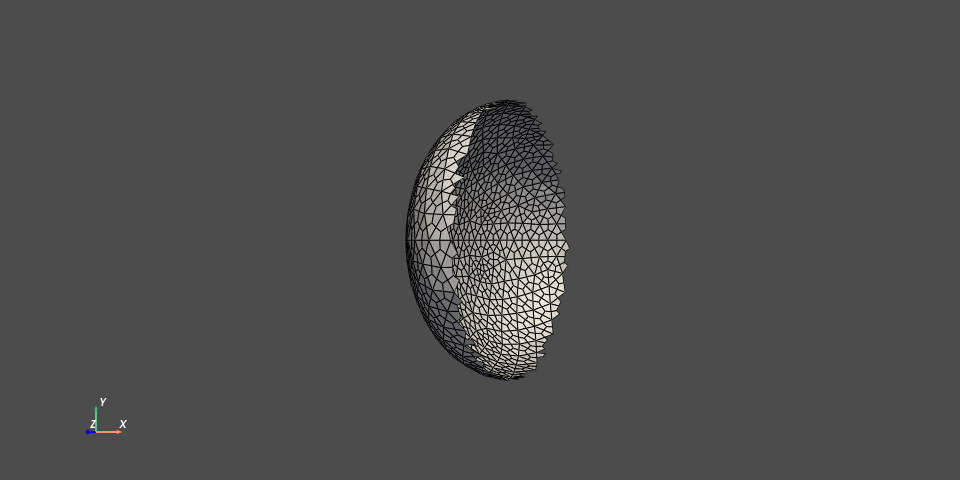

In [13]:
p = plot_mesh(divmesh, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

# 3d Volume Tests

In [14]:
centre = [0.0, 0.0, 0.0]
radii = [1.0, 1.5, 2.0]
mesh_size = 0.5
with pygmsh.geo.Geometry() as geom:
    geom.add_ellipsoid(centre, radii, mesh_size, with_volume=True)
    pygmsh_mesh = geom.generate_mesh(dim=3)
    pygmsh.write('ellipsoid.msh')
mesh = meshio.read("ellipsoid.msh")
os.remove("ellipsoid.msh")

In [15]:
# Try tet2hex with pyvista mesh:
pyvista_mesh = create_pyvista_grid(mesh)
divmesh = tetridiv.tet2hex(pyvista_mesh, output_type='meshio')

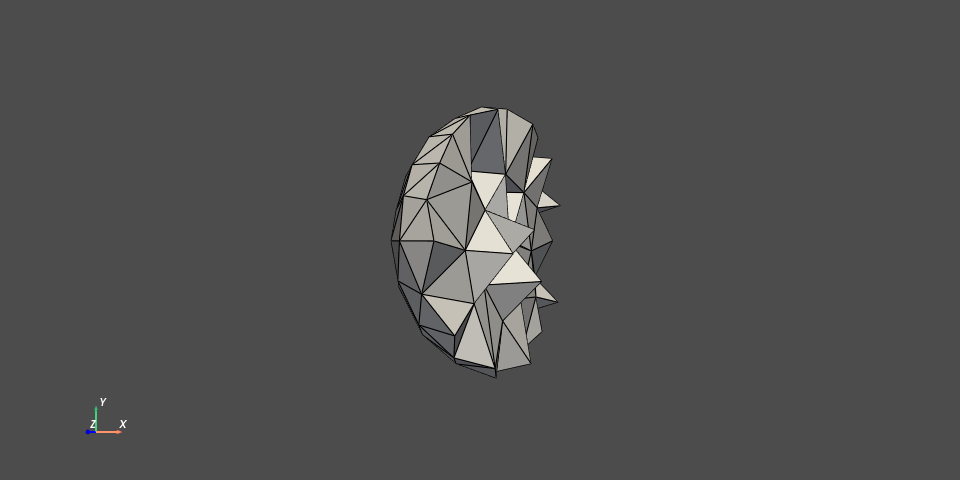

In [16]:
p = plot_mesh(mesh, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

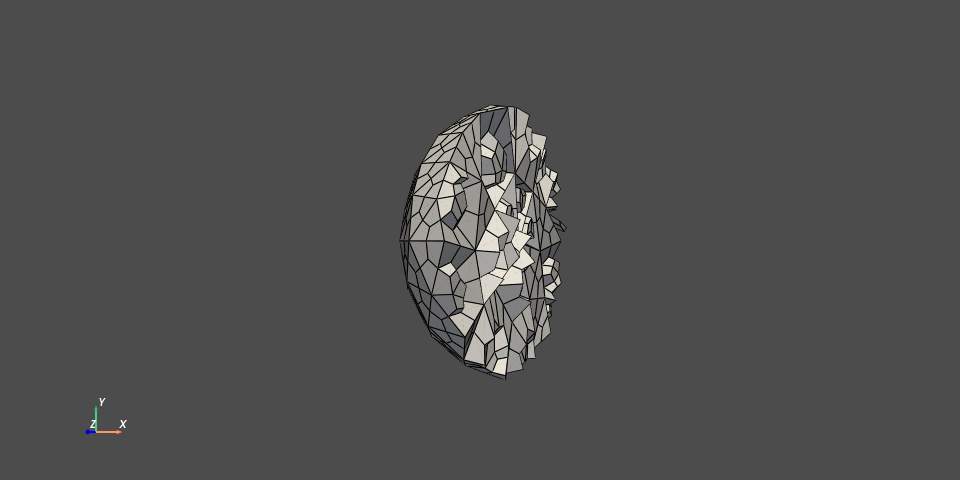

In [17]:
p = plot_mesh(divmesh, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)